In [385]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential

import os
os.getcwd()

'C:\\Users\\Tim\\Documents\\machine_learning_class\\Contest1\\models\\image_generation'

In [470]:
dataframe = pd.read_csv('../../test.csv')
dataset = dataframe.values
x_val = dataset.astype(float)

In [471]:
dataframe = pd.read_csv('../../train.csv', delimiter=',')
print(dataframe.shape)

dataset = dataframe.values

y_train = dataset[:,0]
x_train = dataset[:,1:len(dataframe.columns)].astype(float)

(178, 1201)


In [472]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

def encode(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y_train)
    return to_categorical(y), encoder
    
y_train, y_encoder = encode(y_train)
print(y_encoder.classes_)
y_train.view()

['cold' 'dusk' 'flowers' 'impressions' 'oval' 'scene' 'trees' 'water']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [473]:
def y_converter(y, encoder):
    return encoder.inverse_transform(np.argmax(y, axis=1))

y_converter(y_train, y_encoder).view()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['oval', 'flowers', 'cold', 'scene', 'water', 'impressions',
       'impressions', 'impressions', 'cold', 'impressions', 'trees',
       'dusk', 'water', 'trees', 'trees', 'water', 'water', 'flowers',
       'scene', 'dusk', 'oval', 'dusk', 'flowers', 'water', 'flowers',
       'trees', 'flowers', 'flowers', 'water', 'cold', 'cold', 'trees',
       'trees', 'dusk', 'flowers', 'trees', 'scene', 'scene', 'cold',
       'dusk', 'dusk', 'flowers', 'cold', 'scene', 'scene', 'impressions',
       'water', 'water', 'flowers', 'cold', 'water', 'dusk', 'water',
       'water', 'dusk', 'flowers', 'impressions', 'impressions',
       'impressions', 'water', 'scene', 'scene', 'dusk', 'water',
       'impressions', 'scene', 'flowers', 'scene', 'cold', 'water',
       'scene', 'dusk', 'dusk', 'scene', 'water', 'cold', 'scene',
       'scene', 'impressions', 'impressions', 'cold', 'cold', 'trees',
       'impressions', 'scene', 'flowers', 'dusk', 'dusk', 'flowers',
       'cold', 'oval', 'water

In [474]:
x_train.shape
x_train.dtype

dtype('float64')

In [339]:
from keras.optimizers import SGD
from keras.constraints import maxnorm

def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=1200, kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation='softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    return model

In [340]:

model = create_model(0.5, 0)
model.fit(x_train, y_train, epochs=100, batch_size=20, verbose=0)

In [341]:
score = model.evaluate(x_train, y_train, batch_size=20)

178/178 [==============================] - 0s 1ms/step


In [342]:
print(score)

[1.990357657496849, 0.19662921817115184]


In [343]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

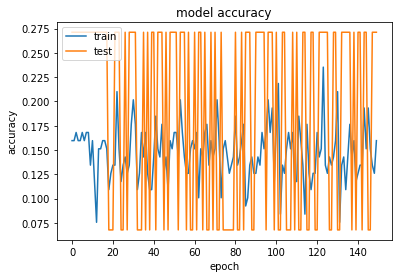

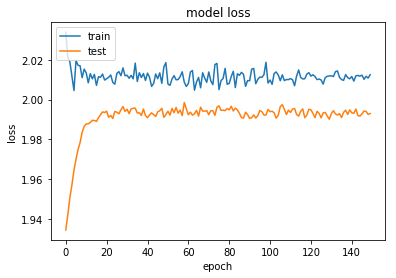

In [344]:
import matplotlib.pyplot as plt

# list all data in history
def history_plot(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
history_plot(history)

In [475]:
def img_converter(x):
    obs = len(x)
    r = x[:, 0:1198:3]
    g = x[:, 1:1199:3]
    b = x[:, 2:1200:3]
    r = r[:,:].reshape(obs, 20, 20)
    g = g[:,:].reshape(obs, 20, 20)
    b = b[:,:].reshape(obs, 20, 20)
    rgb = np.stack((r, g, b), axis=3)
    return rgb

x_train = img_converter(x_train)
x_train.shape

(178, 20, 20, 3)

In [476]:
x_val = img_converter(x_val)
x_val.shape

(63, 20, 20, 3)

In [364]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

def covnet():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [369]:
model = covnet()
history = model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

In [370]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

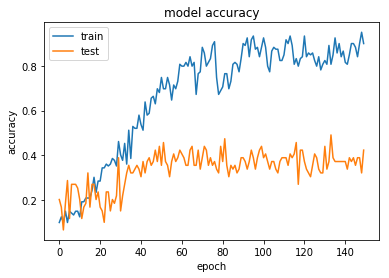

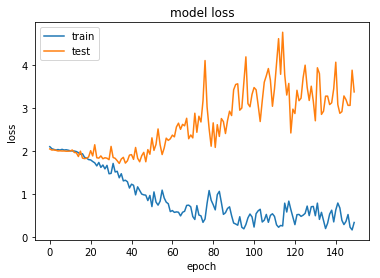

In [371]:
history_plot(history)

In [454]:
test_outcomes = model.predict(x_val, batch_size=10)
id_data = np.r_[1:64]
class_data = y_converter(test_outcomes, y_encoder)
test_df = pd.DataFrame(data={'id': id_data, 'class': class_data}, columns=['id', 'class'])
test_df.to_csv('covnet_sub.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


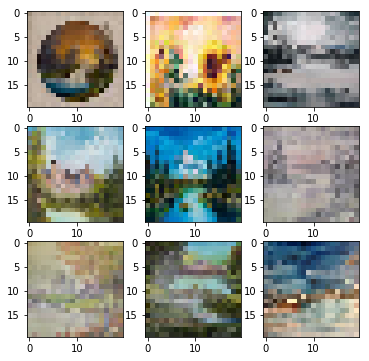

In [357]:
plt.figure(figsize=(6, 6))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])

plt.show()

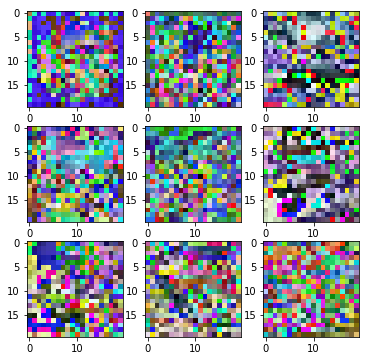

In [554]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(x_train)

plt.figure(figsize=(6, 6))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i])
    # show the plot
    pyplot.show()
    break

C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py:492: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


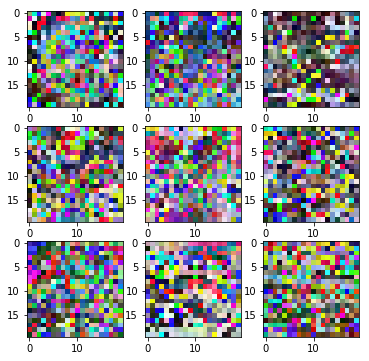

In [555]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(x_train)

plt.figure(figsize=(6, 6))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i])
    # show the plot
    pyplot.show()
    break

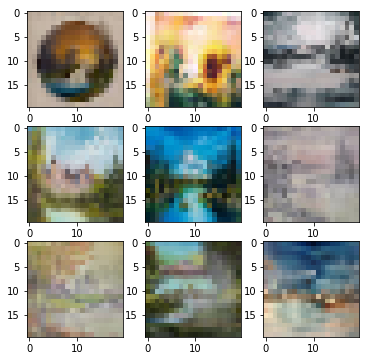

In [561]:
shift = 0.01
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=shift, height_shift_range=shift, rotation_range=5)
datagen.fit(x_train)

plt.figure(figsize=(6, 6))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i])
    # show the plot
    pyplot.show()
    break

In [562]:
from sklearn.model_selection import train_test_split

x_training, x_testing, y_training, y_testing = train_test_split(x_train, y_train, test_size=0.33)


def network_gens(center=False, std=False, zca=False, shift=0.01):
    train = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=5,
        width_shift_range=shift,
        height_shift_range=shift,
        horizontal_flip=True)

    test = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        zca_whitening=False)
    return train, test

train_gen, test_gen = network_gens(center=True, std=True, zca=True)

train_gen.fit(x_training)
test_gen.fit(x_testing)

In [ ]:
model = covnet()
history = model.fit_generator(
    train_gen.flow(x_training, y_training, batch_size=10),
    steps_per_epoch=len(x_training) / 10, 
    epochs=150,
    validation_data=test_gen.flow(x_testing, y_testing, batch_size=10),
    validation_steps=len(x_testing) / 10,
    verbose=0)

In [ ]:
history_plot(history)

In [537]:
test_gen.fit(x_val)
test_outcomes = model.predict_generator(test_gen.flow(x_val, shuffle=False))

id_data = np.r_[1:64]
class_data = y_converter(test_outcomes, y_encoder)
test_df = pd.DataFrame(data={'id': id_data, 'class': class_data}, columns=['id', 'class'])
test_df.to_csv('covnet_sub_data_gen_norm_std.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [549]:
from keras.optimizers import rmsprop

def deep_cnn(num_classes=8):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(20, 20, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = rmsprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [552]:
model = deep_cnn()
history = model.fit(x_train, y_train, validation_split=0.33, epochs=300, batch_size=10, verbose=0)

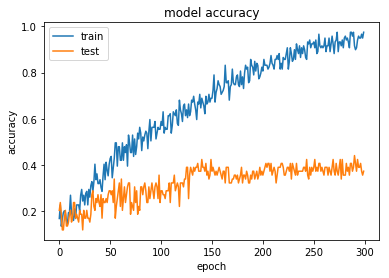

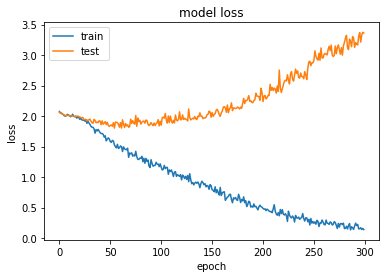

In [553]:
history_plot(history)